In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [21]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [catboost]2/3 [catboost]


In [22]:
from catboost import CatBoostRegressor

In [2]:
dataForTrees = pd.read_csv('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/dataForTreebasedAlgo.csv')
dataForTrees.head(5)

,Odometer,Price,carAge,Model_Enc,Company_Ford,Company_Honda,Company_Hyundai,Company_Jeep,Company_KIA,Company_MG,...,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,State_HR,State_OTH,State_UP
0,4871000.0,9.49,7,10.460000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,783000.0,15.65,1,11.822000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,5798000.0,8.48,3,7.731667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,8958000.0,9.99,4,11.822000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,3660000.0,7.63,3,7.315000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [3]:
X= dataForTrees.drop(columns=['Price'])
y = dataForTrees.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(964, 25)
(242, 25)
(964,)
(242,)


In [27]:
parameter = {
    "DecisionTreeRegressor": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["squared_error", "friedman_mse", "poisson"]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": [ "sqrt", "log2"],
        "bootstrap": [True, False]
    },
    "CatBoostRegressor":{
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [500, 1000],
        'l2_leaf_reg': [1, 3, 5, 7],
        'bagging_temperature': [0.0, 0.3, 0.7],
        'subsample': [0.7, 0.9, 1.0]
    }
}

In [28]:
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "CatBoostRegressor": CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42)
}

In [29]:
best_models = {}

for name, model in models.items():
    print(f"\nRunning GridSearchCV for {name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=parameter[name],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)  
    
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

    # Evaluate
    y_pred = grid.predict(X_test)
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")


Running GridSearchCV for DecisionTreeRegressor...
Best params for DecisionTreeRegressor: {'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
MSE: 2.1586
R2: 0.9614

Running GridSearchCV for RandomForestRegressor...
Best params for RandomForestRegressor: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.9291
R2: 0.9834

Running GridSearchCV for CatBoostRegressor...
Best params for CatBoostRegressor: {'bagging_temperature': 0.0, 'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'subsample': 1.0}
MSE: 0.8261
R2: 0.9852


In [31]:
best_model = best_models['CatBoostRegressor']


In [55]:
import joblib

joblib.dump(best_model,"best_model.pkl")

['best_model.pkl']

In [56]:
model= joblib.load('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/notebooks/best_model.pkl')

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"mean_squared_error: {mse}")
print(f"mean_absolute_error: {mae}")
print(f"r2_score: {r2}")

mean_squared_error: 0.8261020976742379
mean_absolute_error: 0.5321246862420786
r2_score: 0.9852275040989602


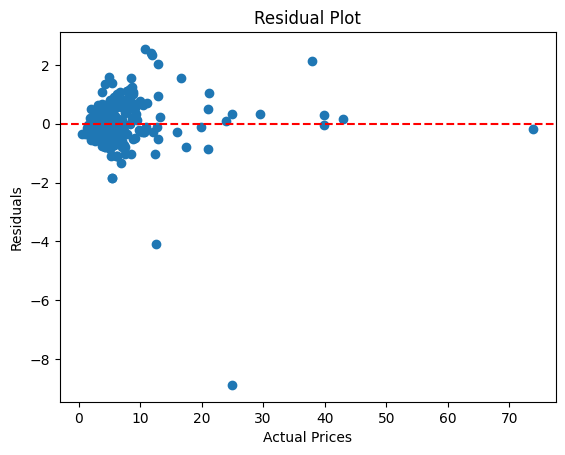

In [36]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [40]:
y_train_pred = model.predict(X_train)
# Metrics on training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")


Train MSE: 0.1504, MAE: 0.3015, R2: 0.9963


In [41]:
print(f"Test MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Test MSE: 0.8261, MAE: 0.5321, R2: 0.9852


- model slightly overfitting 
- However, the difference is small and test performance is still excellent, so it’s not a major concern.

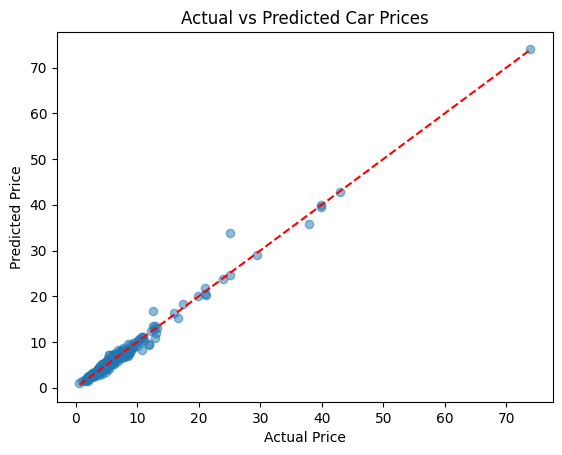

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


# now for the model that are affected by the scaled 

In [44]:
dataforScaledSensModel= pd.read_csv('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/dataForScaleSensiModel.csv')

In [45]:
dataforScaledSensModel.shape

(1206, 26)

In [46]:
X = dataforScaledSensModel.drop(columns=['Price'])
y = dataforScaledSensModel.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(964, 25)
(242, 25)
(964,)
(242,)


In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [53]:
models_non_tree = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "KernelRidge": KernelRidge(),
    "SGDRegressor": SGDRegressor()
}


parameter_non_tree = {
    "LinearRegression": {
        "fit_intercept": [True, False],
        "positive": [True, False]
    },
    "Ridge": {
        "alpha": [0.01, 0.1, 1, 10, 100],
        "solver": ["auto", "svd", "cholesky", "lsqr"]
    },
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 1, 10],
        "max_iter": [1000, 5000, 10000]
    },
    "ElasticNet": {
        "alpha": [0.001, 0.01, 0.1, 1],
        "l1_ratio": [0.1, 0.5, 0.7, 0.9],
        "max_iter": [1000, 5000]
    },
    "SVR": {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [0.1, 1, 10, 100],
        "epsilon": [0.01, 0.1, 0.2, 0.5],
        "gamma": ["scale", "auto"]
    },
    "KNeighborsRegressor": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
        "p": [1, 2]  
    },
    "KernelRidge": {
        "alpha": [0.1, 1, 10],
        "kernel": ["linear", "polynomial", "rbf"],
        "gamma": [0.01, 0.1, 1]
    },
    "SGDRegressor": {
        "loss": ["squared_error", "huber", "epsilon_insensitive"],
        "penalty": [None, "l2", "l1", "elasticnet"],
        "alpha": [0.0001, 0.001, 0.01],
        "max_iter": [1000, 5000]
    }
}


In [54]:
best_models_non_tree = {}

for name, model in models_non_tree.items():
    print(f"running grid Search cv for {name}")

    grid = GridSearchCV(
        estimator=model,
        param_grid=parameter_non_tree[name],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid.fit(X_train,y_train)

    best_models_non_tree[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

    # Evaluate
    y_pred = grid.predict(X_test)
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")

running grid Search cv for LinearRegression
Best params for LinearRegression: {'fit_intercept': False, 'positive': False}
MSE: 0.0364
R2: 0.9716
running grid Search cv for Ridge
Best params for Ridge: {'alpha': 10, 'solver': 'lsqr'}
MSE: 0.0386
R2: 0.9699
running grid Search cv for Lasso
Best params for Lasso: {'alpha': 0.01, 'max_iter': 1000}
MSE: 0.0379
R2: 0.9705
running grid Search cv for ElasticNet
Best params for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.7, 'max_iter': 1000}
MSE: 0.0377
R2: 0.9706
running grid Search cv for SVR
Best params for SVR: {'C': 100, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 0.0382
R2: 0.9702
running grid Search cv for KNeighborsRegressor
Best params for KNeighborsRegressor: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
MSE: 0.1135
R2: 0.9116
running grid Search cv for KernelRidge
Best params for KernelRidge: {'alpha': 10, 'gamma': 0.01, 'kernel': 'linear'}
MSE: 0.0386
R2: 0.9699
running grid Search cv for SGDRegressor
Best params fo

- our goal is to get best predictive accuracy → therefore going with catboostRegressor